## Example 11: Variable timestep method
* https://github.com/LFPy/LFPy/blob/master/examples/LFPy-example-11.ipynb

In [1]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

--No graphics will be displayed.


In [2]:
# fix seed
np.random.seed(1234)

In [3]:
# Cell parameters
cell_params = dict(
    morphology='morphologies/L5_Mainen96_LFPy.hoc',
    dt=0.05, # simulation time resolution, will be ignored for variable_dt methods (ms)
    tstop=100, # simulation time (ms)
    passive=True, # use passive mechanism
)
# Synapse parameters
syn_params = dict(
    idx=0, # compartment index
    syntype='ExpSyn', # exponential conductance synapse type
    record_current=True, # record synaptic current
    e=0, # reversal potential (mV)
    tau=5, # synaptic time constant (ms)
    weight=0.01 # synaptic max conductance (uS)
)
# electrode parameters
electrode_params = dict(
    sigma=0.3,  # extracellular conductivity [S/m]
    x = np.array([100.]),
    y = np.array([0.]),
    z = np.array([1000.]),
    method='linesource'
)

In [4]:
# synapse activation times (ms)
sptimes = np.random.rand(100)*1000
sptimes = np.sort(sptimes)

In [5]:
def simulation(variable_dt=False):
    '''
    Parameters
    ----------
    variable_dt: bool
        whether or not variable timestep method is used
    
    Returns
    -------
    tvec: ndarray
        simulation time vector (ms)
    somav: ndarray
        cell somatic voltage (mV)
    syni: ndarray
        synaptic current (nA)
    tictoc: float
        simulation time (s)
    '''
    cell = LFPy.Cell(**cell_params)
    syn = LFPy.Synapse(cell, **syn_params)
    electrode = LFPy.RecExtElectrode(cell, **electrode_params)
    syn.set_spike_times(sptimes=sptimes)
    toc = time()
    cell.simulate(probes=[electrode], variable_dt=variable_dt)
    tic = time()
    return cell.tvec, cell.somav, syn.i, electrode.data, tic-toc
   

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1022298/1812467357.py:16: SyntaxWarning: invalid escape sequence '\D'
  axes[3].set_ylabel('$\Delta t$ (ms)')


simulation time, variable_dt=True: 69.03 (ms)
simulation time, variable_dt=False: 226.52 (ms)


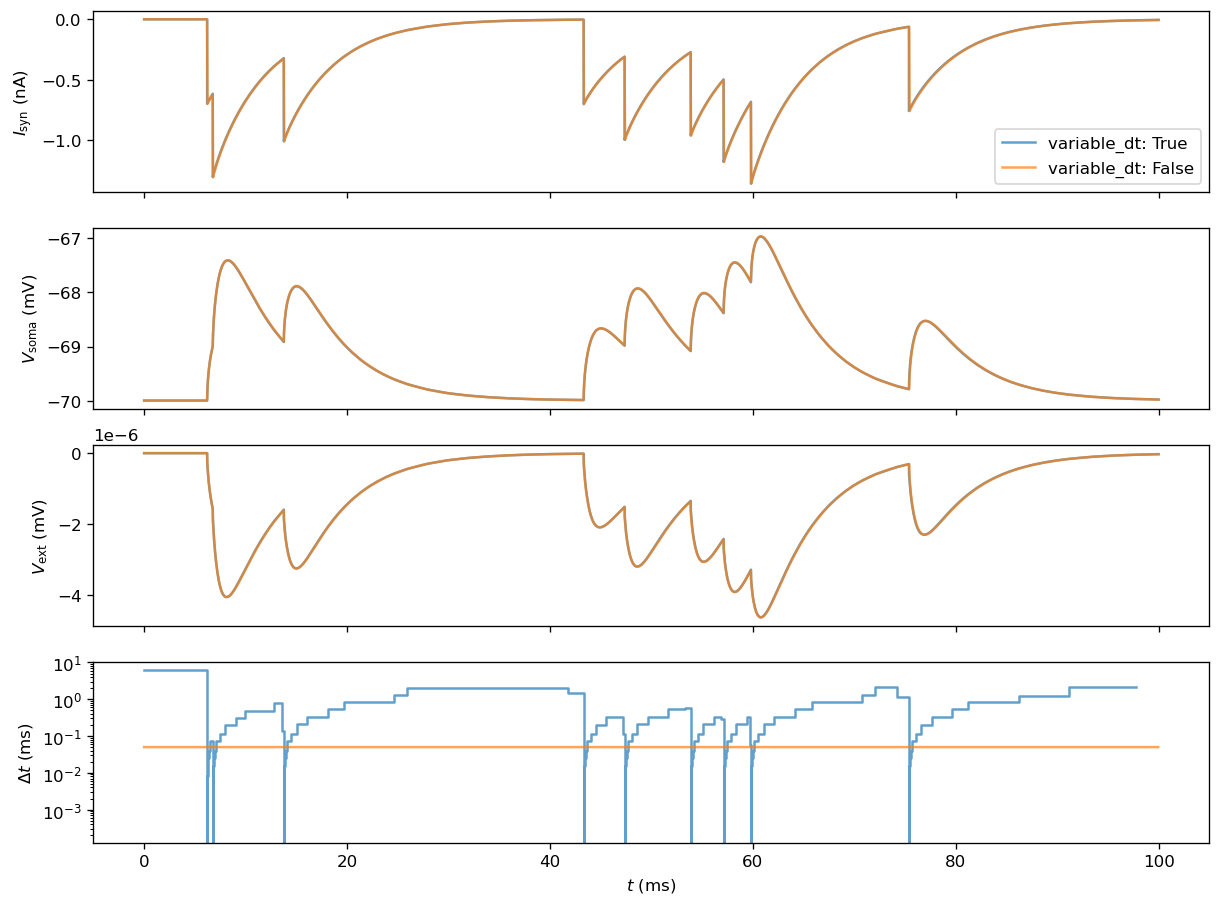

In [8]:
# run simulation, plot comparison of output
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 9), dpi=120)
for variable_dt in [True, False]:
    # run prediction
    tvec, somav, syni, lfp, tictoc = simulation(variable_dt)
    
    print('simulation time, variable_dt={}: {:.02f} (ms)'.format(variable_dt, tictoc*1000))
    axes[0].plot(tvec, syni, label='variable_dt: {}'.format(variable_dt), alpha=0.7)
    axes[0].set_ylabel(r'$I_\mathrm{syn}$ (nA)')
    axes[1].plot(tvec, somav, alpha=0.7)
    axes[1].set_ylabel(r'$V_\mathrm{soma}$ (mV)')
    axes[2].plot(tvec, lfp[0], alpha=0.7)
    axes[2].set_ylabel(r'$V_\mathrm{ext}$ (mV)')
    axes[3].step(tvec[:-1], np.diff(tvec), where='post', alpha=0.7)
    axes[3].semilogy()
    axes[3].set_ylabel('$\Delta t$ (ms)')
    axes[3].set_xlabel(r'$t$ (ms)')
_ = axes[0].legend(loc='best')